In [17]:
"""Jonathan Zhang"""
%matplotlib inline
import sys
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn
from IPython.display import Audio
import IPython.display as ipd
import requests
import os
import sklearn
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Function for a genre classifier of two different audios
def genre_classifier(audio1, audio2):
    
    #Load 120 seconds of the audios
    song1 = librosa.load(audio1, duration = 120)
    song2 = librosa.load(audio2, duration = 120)
    
    #Prepare scaling the features to have zero mean and unit variance
    scaler = sklearn.preprocessing.StandardScaler()
    
    #Calculate the MFCC for audio1
    mfcc_song1 = librosa.feature.mfcc(song1[0], song1[1])
    mfcc_song1 = mfcc_song1.T
    #Scale the MFCC
    mfcc_song1_scaled = scaler.fit_transform(mfcc_song1)
    
    #Calculate the MFCC for audio2
    mfcc_song2 = librosa.feature.mfcc(song2[0], song2[1])
    mfcc_song2 = mfcc_song2.T
    #Scale the MFCC
    mfcc_song2_scaled = scaler.fit_transform(mfcc_song2)
    
    #Concatenate all of the scaled feature vectors into one feature table 
    features = np.vstack((mfcc_song1_scaled, mfcc_song2_scaled))
    labels = np.concatenate((np.zeros(len(mfcc_song1_scaled)), np.ones(len(mfcc_song2_scaled))))
    
    #Support Vector Machine
    model = sklearn.svm.SVC()
    #Train the classifier
    model.fit(features, labels)
    
    #Load smaller samples of the audios
    x_song1_test, fs_song1 = librosa.load(audio1, duration=10, offset=120)
    x_song2_test, fs_song2 = librosa.load(audio2, duration=10, offset=120)
    
    #Calculate the MFCCs for the two samples
    mfcc_song1_test = librosa.feature.mfcc(x_song1_test, fs_song1)
    mfcc_song1_test = mfcc_song1_test.T
    mfcc_song2_test = librosa.feature.mfcc(x_song2_test, fs_song2)
    mfcc_song2_test = mfcc_song2_test.T
    
    #Scale the MFCCs
    mfcc_song1_test_scaled = scaler.fit_transform(mfcc_song1_test)
    mfcc_song2_test_scaled = scaler.fit_transform(mfcc_song2_test)
    
    #Concatenate all test features together
    test_features = np.vstack((mfcc_song1_test_scaled, mfcc_song2_test_scaled))
    #Concatenate all test labels together 
    test_labels = np.concatenate((np.zeros(len(mfcc_song1_test_scaled)), np.ones(len(mfcc_song2_test_scaled))))
    
    #Compute the accuracy score of the classifier on the test data
    score = model.score(test_features, test_labels)
    return score

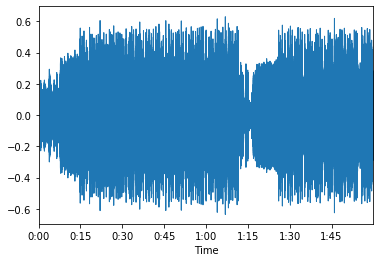

In [3]:
# 120 seconds of the audios
ChanceRapper = librosa.load('data/noproblem.mp3', duration = 120) # No Problem - Chance The Rapper
KatyPerry = librosa.load('data/firework.mp3', duration = 120) # Firework - Katy Perry

# Time-domain waveform of ChanceRapper
librosa.display.waveplot(ChanceRapper[0])

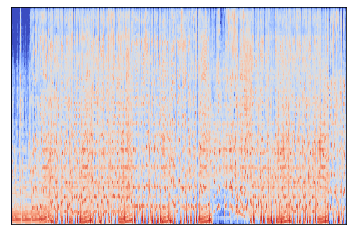

In [4]:
# The mel spectogram with a logged scale for ChanceRapper
ChanceRapper_mel = librosa.feature.melspectrogram(ChanceRapper[0])
ChanceRapper_mel_log = librosa.power_to_db(ChanceRapper_mel)
librosa.display.specshow(ChanceRapper_mel_log)

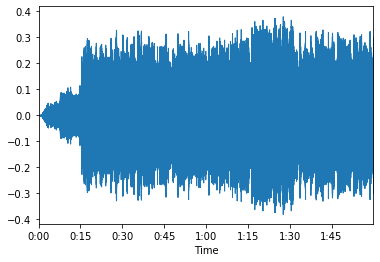

In [5]:
# The time-domain waveform of KatyPerry
librosa.display.waveplot(KatyPerry[0])

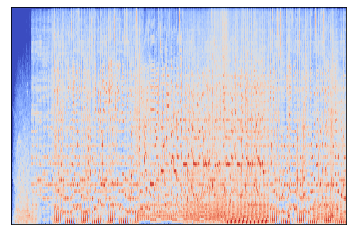

In [6]:
# The mel spectogram with a logged scale for KatyPerry
KatyPerry_mel = librosa.feature.melspectrogram(KatyPerry[0])
KatyPerry_mel_log = librosa.power_to_db(KatyPerry_mel)
librosa.display.specshow(KatyPerry_mel_log)

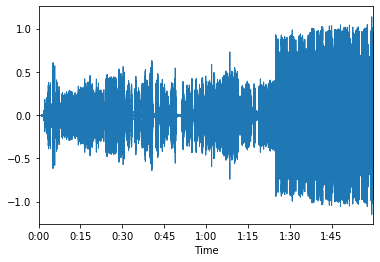

In [7]:
# 120 seconds of the audios
ChanceRapper2 = librosa.load('data/hotshower.mp3', duration = 120)
KatyPerry2 = librosa.load('data/teenagedreams.mp3', duration = 120)

# The time-domain waveform of ChanceRapper2
librosa.display.waveplot(ChanceRapper2[0])

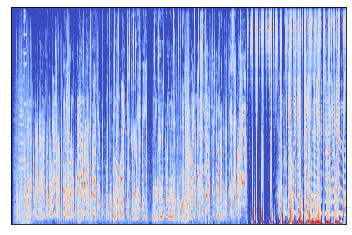

In [8]:
# The mel spectogram with a logged scale for ChanceRapper2
ChanceRapper2_mel = librosa.feature.melspectrogram(ChanceRapper2[0])
ChanceRapper2_mel_log = librosa.power_to_db(ChanceRapper2_mel)
librosa.display.specshow(ChanceRapper2_mel_log)

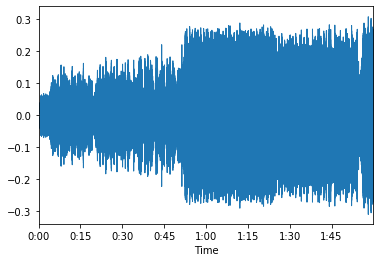

In [9]:
#Plot the time-domain waveform of KatyPerry2
librosa.display.waveplot(KatyPerry2[0])

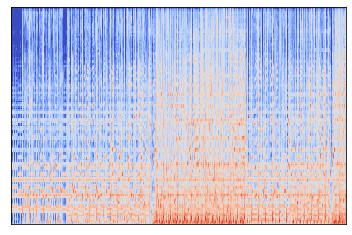

In [10]:
#Calculate and display the mel spectogram with a logged scale for KatyPerry2
KatyPerry2_mel = librosa.feature.melspectrogram(KatyPerry2[0])
KatyPerry2_mel_log = librosa.power_to_db(KatyPerry2_mel)
librosa.display.specshow(KatyPerry2_mel_log)

In [11]:
genre_classifier('data/noproblem.mp3', 'data/firework.mp3')

0.8526682134570766

In [12]:
genre_classifier('data/hotshower.mp3', 'data/firework.mp3')

0.5730858468677494

In [13]:
genre_classifier('data/noproblem.mp3', 'data/teenagedreams.mp3')

0.8074245939675174

In [14]:
genre_classifier('data/hotshower.mp3', 'data/teenagedreams.mp3')

0.6554524361948956

In [15]:
genre_classifier('data/teenagedreams.mp3', 'data/firework.mp3')

0.703016241299304

In [16]:
genre_classifier('data/noproblem.mp3', 'data/hotshower.mp3')

0.5336426914153132

My Findings:

The two songs from Chance The Rapper are of the genre Hip-Hop or Rap, and the two songs from Katy Perry are are of the genre Pop. Automatically, we should expect the two Hip-Hop songs to have low scores when compared with Katy Perry's two Pop songs. Also some things that we should expect is when comparing the two Hip-Hop songs from Chance The Rapper is likeness, due to the songs being made by the same artist, however the songs sound different. Vice-versa with Katy perry's two songs, as we should expect a high score for similarity. 

We can see that based on the accuracy scores for comparing Chance's song, "No Problem," and Perry's song, "Firework," that we have unexpected results. The genre classifier gave a score of (0.85) which is significantly high, which leads me to believe that the genre_classifier method takes into account major/minor pitches as both of these songs utilize "happy" sounds to coordinate with what they're trying to sing about, which in this case, I think the classifier noticed both songs using a lot of the similar major chords. 

It's interesting to observe the accuracy score for comparing both of Chance's songs, "No Problem" and "Hot Shower." The comparison between the two songs returned a score of (0.53) which is very low, considering that they're both of the same genre and not to mention artist. Looking at the plotted waveforms produced through comparison, there's a lot of differences in shape and relative heights corresponding to timestamp. Through listening, the songs are very different in comparison because "No Problem" sounds more like Hip-Hop and "Hot Shower" sounds more like Rap. Overall, I would have expected even if these songs sounded different, they were from the same artist so I expected at least a score of (0.65+).